# Tech Challenge

>Aluno: Lucas Silveira Campos 

>RM: rm364591

# Instruções

## O problema
>Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

## Tarefas

### Exploração de dados:

>Carregue a base de dados e explore suas características;
>Analise estatísticas descritivas e visualize distribuições relevantes.

### Pré-Processamento de dados:

>Realize a limpeza dos dados, tratando valores ausentes (se necessário);
> Converta variáveis categóricas em formatos adequados para modelagem.

### Modelagem

>Crie um modelo $preditivo de regressão$ utilizando uma técnica à sua escolha (por exemplo: Regressão Linear, Árvore de Decisão, etc);

### Treinamento e avaliação do modelo:
>Treine o modelo com o conjunto de treinamento.

### Validação estatística:
>Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

### Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### Entregável:
>Vídeo junto com link do github do projeto e o código desenvolvido, apresentando passo a passo do que foi utilizado, como a fonte de dados e como os modelos foram criados.

> O vídeo deve estar disponível em uma plataforma como o Youtube e deve contar até 10 minutos.


## Sobre o projeto:

>Desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.



## Considerações do dataset (fonte: kaggle)
https://www.kaggle.com/datasets/karthikeyanrajuz/medical-insurance-prediction-dataset?resource=download
>O campo patient_id foi o único ignorado na análise

## Modelo preditivo de regressão escolhido:
>A definir

In [8]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


### Biliotecas:

    Numpy
    Pandas
    Matplotlib
    Scikit-learn

In [15]:
pip install pandas numpy matplotlib scikit-learn openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]
Note: you may need to restart the kernel to use updated packages.


### Importando Bibliotecas

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Tratando os dados
> Construindo o DataFrame

In [47]:
dataFrameRaw = pd.read_excel('Dataset.xlsx')
dataFrameRaw = dataFrameRaw.drop('patient_id', axis=1)

# As colunas a seguir precisam ser tratadas por um Label Encoder pois sao valores nao numericos
colunasATratarComLabelEncoder = [
    'patient_occupation',
    'patient_gender',
    'patient_smoking_status',
    'patient_location',
    'patient_covered_by_other_insurance_company',
    'patient_alcohol_consumption',
    'patient_exercise_regimen'
]

# O campo sobre o nivel de colesterol do cliente usa um formato de intervalo, portanto foi utilizado a media desse intervalo
# A funcao abaixo serve especificamente para o campo de nivel de colesterol
def calculate_median_from_range_string(range_string):
    """
    Calculates the median of two numbers from a string in the format 'num1 to num2'.
    Handles potential errors like malformed strings or non-numeric values.

    Args:
        range_string (str): A string representing a numerical range (e.g., '150 to 175').

    Returns:
        float or np.nan: The median of the two numbers, or np.nan if the string
                         cannot be parsed correctly or contains non-numeric values.
    """
    if isinstance(range_string, str):
        try:
            # Split the string by ' to '
            nums_str = range_string.split(' to ')
            if len(nums_str) == 2:
                # Convert the parts to floats
                num1 = float(nums_str[0].strip())
                num2 = float(nums_str[1].strip())
                # Calculate and return the median
                return (num1 + num2) / 2
            else:
                # Handle cases where the split doesn't result in two parts
                return np.nan
        except ValueError:
            # Handle cases where conversion to float fails
            return np.nan
    elif pd.isna(range_string):
        # Handle NaN values
        return np.nan
    else:
        # Handle other unexpected types
        return np.nan


# Aqui fica a principal funcao de tratamento dos dados e responsavel pelo Label Enconder
# Optei por remover os clientes com 'Unkown' (desconhecido) e os que possuiam valores nulos nao regulares 
def label_encode_and_clean(df, columns_to_encode):
    """
    Handles 'patient_cholesterol_level' column by calculating the median from range strings,
    applies Label Encoding to specified columns, and removes rows containing
    'Unknown' or empty values (NaN) in any column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns_to_encode (list): A list of column names to apply Label Encoding to.

    Returns:
        pd.DataFrame: A new DataFrame with 'patient_cholesterol_level' processed,
                      specified columns Label Encoded, and rows with 'Unknown'
                      or empty values removed.
                      Returns None if any column to encode is not found.
    """
    cleaned_df = df.copy() # Create a copy to avoid modifying the original DataFrame

    # 1. Utiliza a funcao acima, criada especificamente para tratar os dados de Nivel de Colesterol
    cholesterol_col = 'patient_cholesterol_level'
    if cholesterol_col in cleaned_df.columns:
        cleaned_df[cholesterol_col] = cleaned_df[cholesterol_col].apply(calculate_median_from_range_string)
        print(f"Processed '{cholesterol_col}' column: calculated median from range strings.")
    else:
        print(f"Warning: Column '{cholesterol_col}' not found in the DataFrame. Skipping median calculation.")


    # Verifica se a as colunas colunasATratarComLabelEncoder estao na tabela.
    # Nao necessario nesse projeto, pois os codigos foram feitos sob medida com o banco de dados em maos
    # Mas achei valido manter essa sugestao de algoritmo gerado.
    if not all(col in cleaned_df.columns for col in columns_to_encode):
        missing_cols = [col for col in columns_to_encode if col not in cleaned_df.columns]
        print(f"Error: The following columns to encode were not found in the DataFrame: {missing_cols}")
        return None

    # Parte que remove os clientes com algum campo 'Unknow'
        # Create a boolean mask that is True for rows that *do not* contain 'Unknown'
        # We convert to string type before checking for 'Unknown'
    unknown_mask = ~(cleaned_df.astype(str).apply(lambda x: x.str.contains('Unknown', na=False)).any(axis=1))
    cleaned_df = cleaned_df[unknown_mask].copy() # Use .copy() to avoid SettingWithCopyWarning

    # 3. Remove oas linhas que nao contem valores, funcao dropna (drop not available)
    cleaned_df.dropna(inplace=True)

    # 4. Parte que aplica o Label Enconding as partes especificadas.
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        # Ensure the column is treated as categorical before encoding
        # This can help avoid issues if the column has mixed types after dropping NaNs
        if col in cleaned_df.columns: # Check if column still exists after dropping NaNs
             cleaned_df[col] = cleaned_df[col].astype('category')
             cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])
        else:
            print(f"Warning: Column '{col}' not found after dropping NaNs. Skipping Label Encoding for this column.")


    return cleaned_df


dataFrame = label_encode_and_clean(dataFrameRaw, colunasATratarComLabelEncoder)


media_colunas = dataFrame.median()


Processed 'patient_cholesterol_level' column: calculated median from range strings.


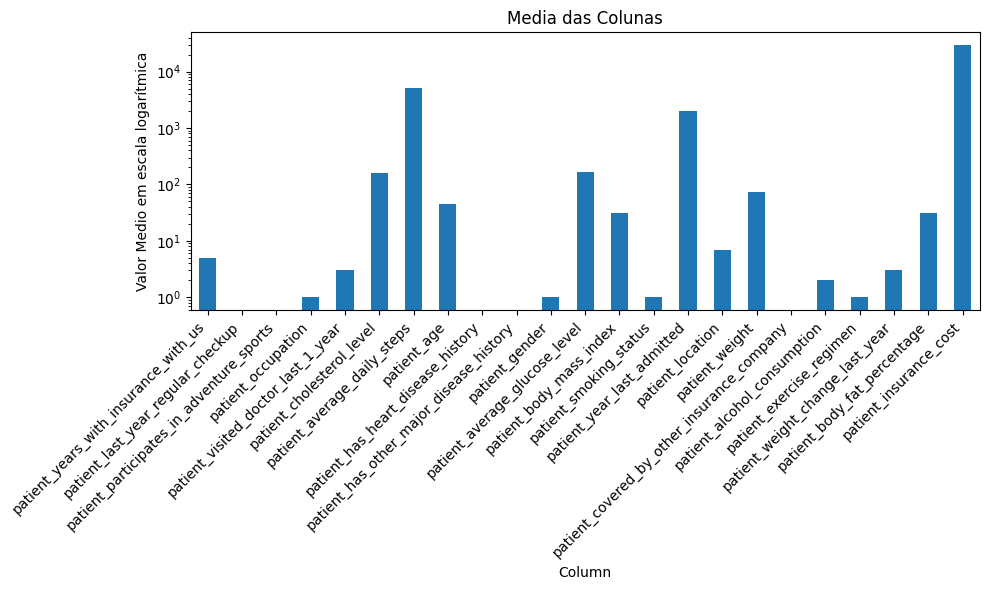

In [48]:
plt.figure(figsize=(10, 6)) 
media_colunas.plot(kind='bar')
plt.yscale('log') ### Parte crucial para melhorar a visibilidade do grafico, aplicar uma escala logarítmica (logarithmic scale)
plt.title('Media das Colunas')
plt.xlabel('Column')
plt.ylabel('Valor Medio em escala logarítmica')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Analisando apenas as medias nao pude perceber algum padrao.

Proxima analise, buscar o valor mais alto de custo de seguro e o mais baixo e plotar ambos para ver se algo fica evidente, ou mais algum padrao irregular.

Com maior custo:
patient_years_with_insurance_with_us              7.0
patient_last_year_regular_checkup                 0.0
patient_participates_in_adventure_sports          0.0
patient_occupation                                0.0
patient_visited_doctor_last_1_year                4.0
patient_cholesterol_level                       212.5
patient_average_daily_steps                    4714.0
patient_age                                      40.0
patient_has_heart_disease_history                 0.0
patient_has_other_major_disease_history           0.0
patient_gender                                    0.0
patient_average_glucose_level                   118.0
patient_body_mass_index                          29.6
patient_smoking_status                            2.0
patient_year_last_admitted                     1992.0
patient_location                                  5.0
patient_weight                                   95.0
patient_covered_by_other_insurance_company        1.0
patient_alc

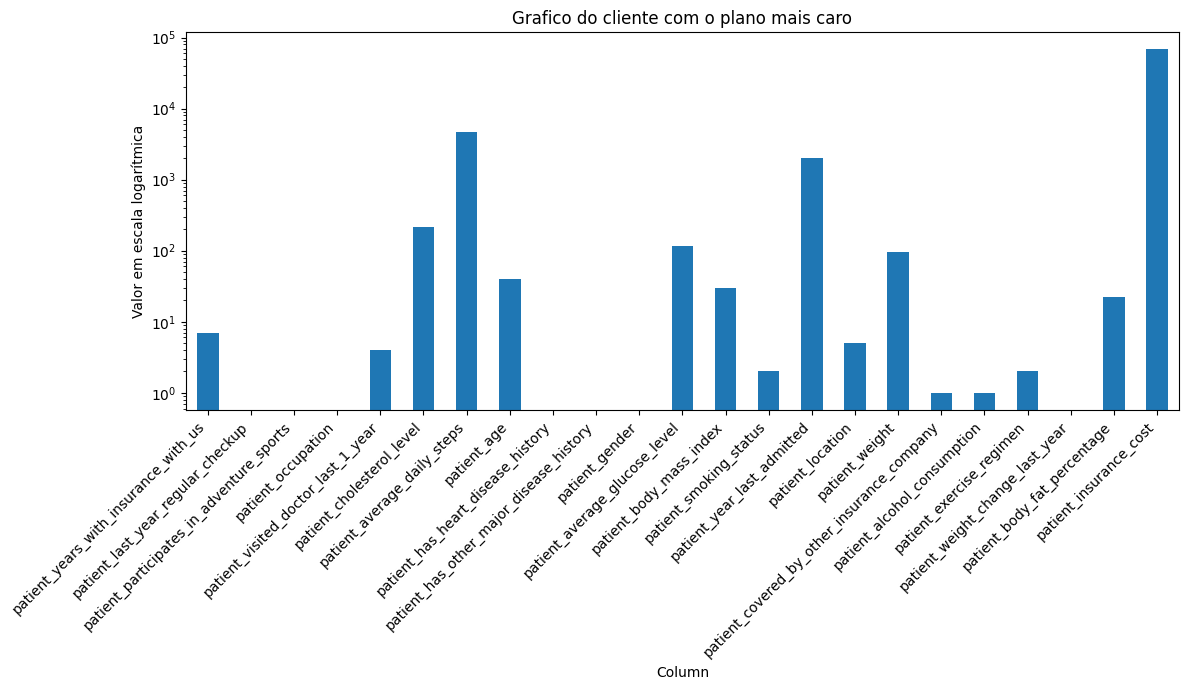

Com menor custo:
patient_years_with_insurance_with_us             3.0
patient_last_year_regular_checkup                1.0
patient_participates_in_adventure_sports         0.0
patient_occupation                               2.0
patient_visited_doctor_last_1_year               3.0
patient_cholesterol_level                      137.5
patient_average_daily_steps                   4761.0
patient_age                                     70.0
patient_has_heart_disease_history                0.0
patient_has_other_major_disease_history          0.0
patient_gender                                   1.0
patient_average_glucose_level                  170.0
patient_body_mass_index                         33.5
patient_smoking_status                           1.0
patient_year_last_admitted                    2018.0
patient_location                                 1.0
patient_weight                                  56.0
patient_covered_by_other_insurance_company       0.0
patient_alcohol_consumption  

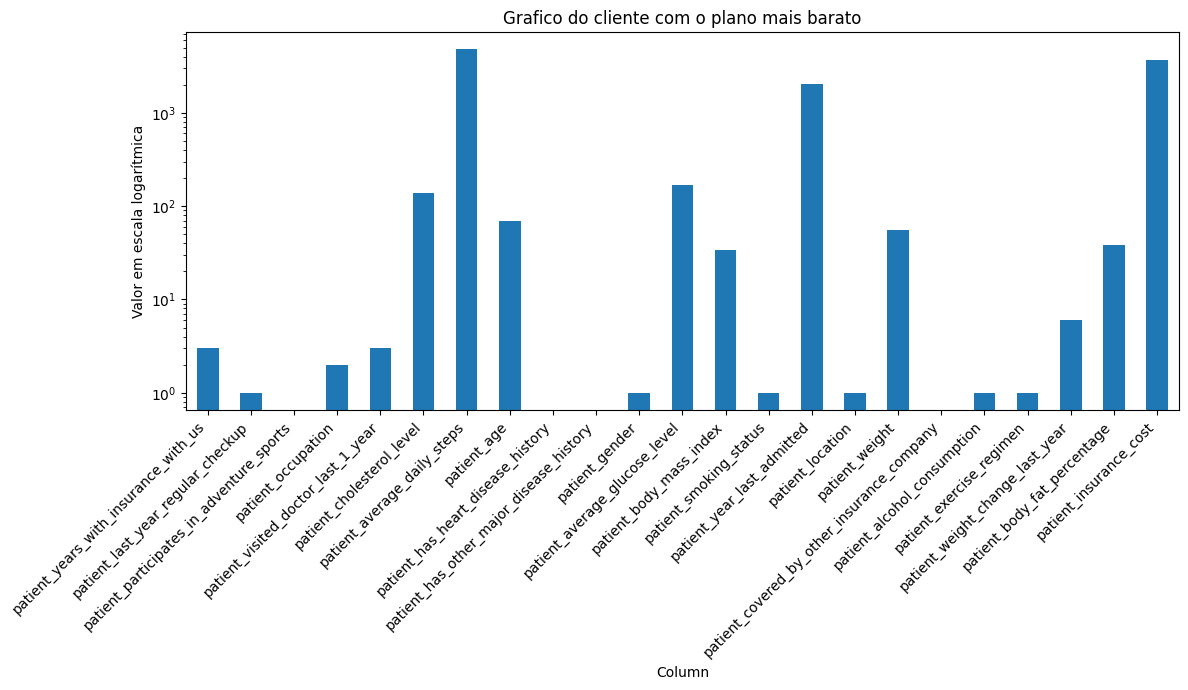

In [49]:
if 'patient_insurance_cost' in dataFrame.columns:
    max_cost_row_index = dataFrame['patient_insurance_cost'].idxmax()

    # 2. Select the row with the highest cost
    highest_cost_row = dataFrame.loc[max_cost_row_index]

    print(f"Com maior custo:")
    print(highest_cost_row)

    # 3. Prepare the data for plotting
    # Select only numeric values from the row using boolean indexing
    numeric_row_values = highest_cost_row[pd.to_numeric(highest_cost_row, errors='coerce').notna()]


    # 4. Plot the row's numeric values
if not numeric_row_values.empty:
    plt.figure(figsize=(12, 7)) # Adjust figure size as needed
    numeric_row_values.plot(kind='bar')
    plt.yscale('log') ### Parte crucial para melhorar a visibilidade do grafico, aplicar uma escala logarítmica (logarithmic scale)
    plt.title(f'Grafico do cliente com o plano mais caro') # Update title
    plt.xlabel('Column')
    plt.ylabel('Valor em escala logarítmica') # Update y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
    plt.tight_layout() # Adjust layout
    plt.show()


# 1. Find the index of the row with the lowest 'patient_insurance_cost'
if 'patient_insurance_cost' in dataFrame.columns:
    min_cost_row_index = dataFrame['patient_insurance_cost'].idxmin()

    # 2. Select the row with the lowest cost
    lowest_cost_row = dataFrame.loc[min_cost_row_index]

    print(f"Com menor custo:")
    print(lowest_cost_row)

    # 3. Prepare the data for plotting
    # Select only numeric values from the row using boolean indexing
    numeric_row_values = lowest_cost_row[pd.to_numeric(lowest_cost_row, errors='coerce').notna()]


    # 4. Plot the row's numeric values
if not numeric_row_values.empty:
    plt.figure(figsize=(12, 7)) # Adjust figure size as needed
    numeric_row_values.plot(kind='bar')
    plt.yscale('log') ### Parte crucial para melhorar a visibilidade do grafico, aplicar uma escala logarítmica (logarithmic scale)
    plt.title(f'Grafico do cliente com o plano mais barato') # Update title
    plt.xlabel('Column')
    plt.ylabel('Valor em escala logarítmica') # Update y-axis label
    plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
    plt.tight_layout() # Adjust layout
    plt.show()

### Ate este ponto, o objetivo foi analisar os dados de maneira visual para ajudar na escolha de um modelo.

### Ate este ponto, o objetivo foi analisar os dados de maneira visual para ajudar na escolha de um modelo.

## Modelo preditivo de regressão escolhido:
>Regressao Linear
